In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import math
from shapely.geometry import LineString

In [3]:
df = pd.read_csv('results.csv')

In [38]:
asc = df[df['input_type']=='ascending']

m_asc = asc[asc['sort_type']=='merge']
i_asc = asc[asc['sort_type']=='insertion']
m_asc = m_asc[['size','comparisons','micro_time']]
m_asc.set_index('size',inplace=True)
i_asc = i_asc[['size','comparisons','micro_time']]
i_asc.set_index('size',inplace=True)

m_asc['i_comparisons'] = i_asc.comparisons
m_asc['i_micro_time'] = i_asc.micro_time
m_asc.rename(columns={'comparisons':'m_comparisons','micro_time':'m_micro_time'},inplace=True)
asc = m_asc

asc.head(20)

#comparisons is for merge comparisons. i for insertion

,m_comparisons,m_micro_time,i_comparisons,i_micro_time
size,,,,
0,0.0,0.00,0.0,0.0
1,0.0,0.00,0.0,0.0
2,1.0,0.00,1.0,0.0
3,3.0,0.00,2.0,0.0
4,4.0,0.00,3.0,0.0
5,7.0,0.00,4.0,0.0
6,9.0,0.00,5.0,0.0
7,11.0,0.00,6.0,0.0
8,12.0,0.00,7.0,0.0


In [39]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

compare_diff = asc.m_comparisons - asc.i_comparisons
time_diff = asc.m_micro_time - asc.i_micro_time
a_compare_intersect = []
a_time_intersect = []
for i in range(len(asc)-1):
    if compare_diff[i] == 0 or compare_diff[i]*compare_diff[i+1]<0:
        a_compare_intersect.append(i)
    if time_diff[i] == 0 or time_diff[i]*time_diff[i+1]<0:
        a_time_intersect.append(i)

print("Ascending Comparison Intersects:")
print(a_compare_intersect)
print("Ascending Time Intersects:")
print(a_time_intersect)


Ascending Comparison Intersects:
[0, 1, 2]
Ascending Time Intersects:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


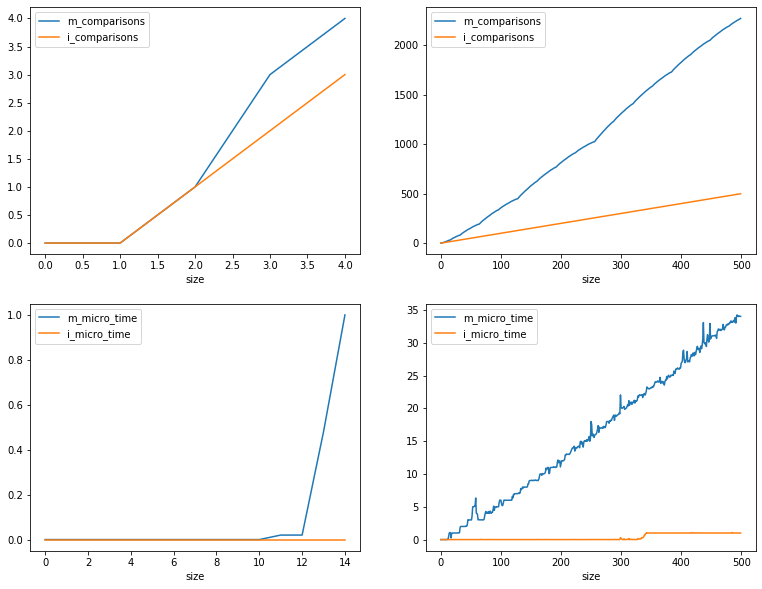

In [40]:
fig, axes = plt.subplots(nrows=2,ncols = 2, figsize=(13,10))

zoom_asc = asc.head(5)
zoom_asc[['m_comparisons','i_comparisons']].plot(ax=axes[0,0])
asc[['m_comparisons','i_comparisons']].plot(ax=axes[0,1])
zoom_asc = asc.head(15)
zoom_asc[['m_micro_time','i_micro_time']].plot(ax=axes[1,0])
asc[['m_micro_time','i_micro_time']].plot(ax=axes[1,1])

In [41]:
dsc = df[df['input_type']=='descending']

m_dsc = dsc[dsc['sort_type']=='merge']
i_dsc = dsc[dsc['sort_type']=='insertion']
m_dsc = m_dsc[['size','comparisons','micro_time']]
m_dsc.set_index('size',inplace=True)
i_dsc = i_dsc[['size','comparisons','micro_time']]
i_dsc.set_index('size',inplace=True)

m_dsc['i_comparisons'] = i_dsc.comparisons
m_dsc['i_micro_time'] = i_dsc.micro_time
m_dsc.rename(columns={'comparisons':'m_comparisons','micro_time':'m_micro_time'},inplace=True)
dsc = m_dsc
dsc.head(20)


#comparisons is for merge comparisons. i for insertion

,m_comparisons,m_micro_time,i_comparisons,i_micro_time
size,,,,
0,0.0,0.00,0.0,0.00
1,0.0,0.00,0.0,0.00
2,1.0,0.00,2.0,0.00
3,2.0,0.00,5.0,0.00
4,4.0,0.00,9.0,0.00
5,5.0,0.00,14.0,0.00
6,7.0,0.00,20.0,0.00
7,9.0,0.00,27.0,0.00
8,12.0,0.00,35.0,0.00


In [42]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

compare_diff = dsc.m_comparisons - dsc.i_comparisons
time_diff = dsc.m_micro_time - dsc.i_micro_time
d_compare_intersect = []
d_time_intersect = []
for i in range(len(m_dsc)-1):
    if compare_diff[i] == 0 or compare_diff[i]*compare_diff[i+1]<0:
        d_compare_intersect.append(i)
    if time_diff[i] == 0 or time_diff[i]*time_diff[i+1]<0:
        d_time_intersect.append(i)
        
print("Descending Comparison Intersects:")
print(d_compare_intersect)
print("Descending Time Intersects:")
print(d_time_intersect)

Descending Comparison Intersects:
[0, 1]
Descending Time Intersects:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 25, 26, 27, 28, 29, 30, 34, 35, 36, 37, 38, 39, 40, 47]


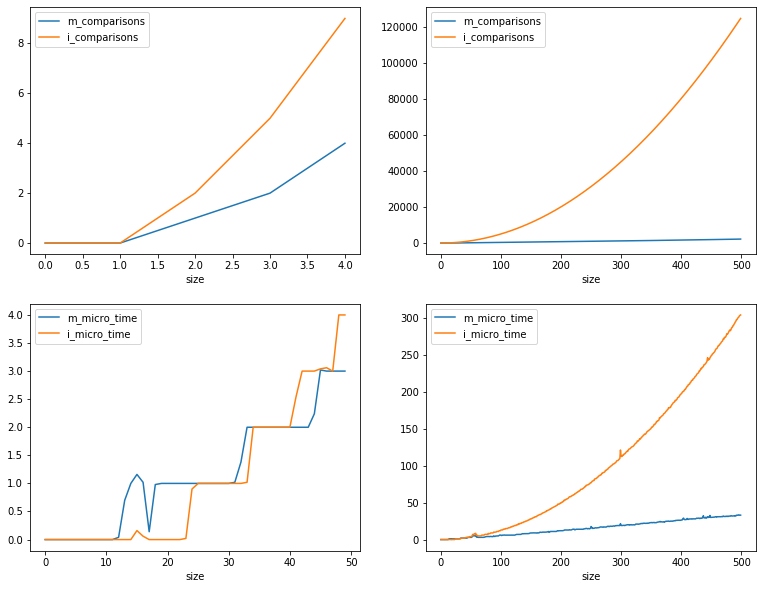

In [43]:
fig, axes = plt.subplots(nrows=2,ncols = 2, figsize=(13,10))

zoom_dsc = dsc.head(5)
zoom_dsc[['m_comparisons','i_comparisons']].plot(ax=axes[0,0])
dsc[['m_comparisons','i_comparisons']].plot(ax=axes[0,1])
zoom_dsc = dsc.head(50)
zoom_dsc[['m_micro_time','i_micro_time']].plot(ax=axes[1,0])
dsc[['m_micro_time','i_micro_time']].plot(ax=axes[1,1])

In [44]:
ran = df[df['input_type']=='random']

m_ran = ran[ran['sort_type']=='merge']
i_ran = ran[ran['sort_type']=='insertion']
m_ran = m_ran[['size','comparisons','micro_time']]
m_ran.set_index('size',inplace=True)
i_ran = i_ran[['size','comparisons','micro_time']]
i_ran.set_index('size',inplace=True)

m_ran['i_comparisons'] = i_ran.comparisons
m_ran['i_micro_time'] = i_ran.micro_time
m_ran.rename(columns={'comparisons':'m_comparisons','micro_time':'m_micro_time'},inplace=True)
ran = m_ran
dsc.head(20)
#comparisons is for merge comparisons. i for insertion

,m_comparisons,m_micro_time,i_comparisons,i_micro_time
size,,,,
0,0.0,0.00,0.0,0.00
1,0.0,0.00,0.0,0.00
2,1.0,0.00,2.0,0.00
3,2.0,0.00,5.0,0.00
4,4.0,0.00,9.0,0.00
5,5.0,0.00,14.0,0.00
6,7.0,0.00,20.0,0.00
7,9.0,0.00,27.0,0.00
8,12.0,0.00,35.0,0.00


In [46]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

compare_diff = ran.m_comparisons - ran.i_comparisons
time_diff = ran.m_micro_time - ran.i_micro_time
r_compare_intersect = []
r_time_intersect = []
for i in range(len(ran)-1):
    if compare_diff[i] == 0 or compare_diff[i]*compare_diff[i+1]<0:
        r_compare_intersect.append(i)
    if time_diff[i] == 0 or time_diff[i]*time_diff[i+1]<0:
        r_time_intersect.append(i)
        
print("Random Comparison Intersects:")
print(r_compare_intersect)
print("Random Time Intersects:")
print(r_time_intersect)


Random Comparison Intersects:
[0, 1]
Random Time Intersects:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 116, 118, 121]


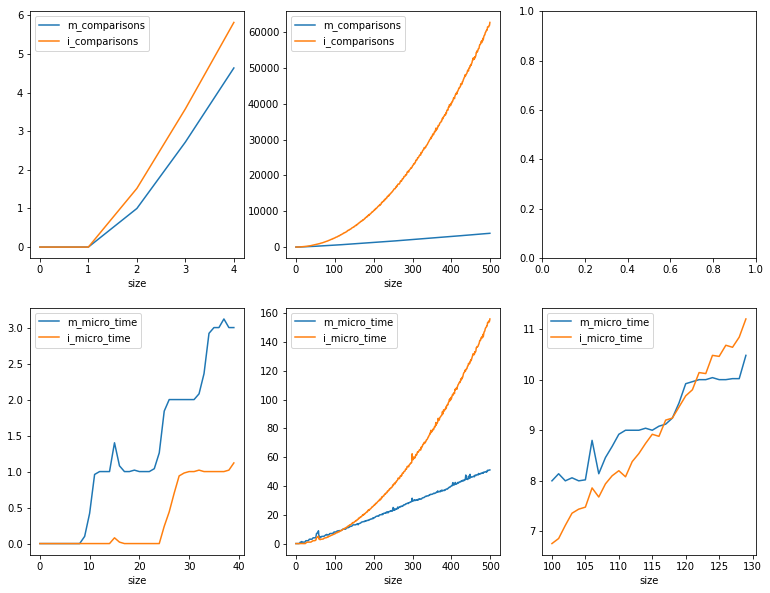

In [52]:
fig, axes = plt.subplots(nrows=2,ncols = 3, figsize=(13,10))

zoom_ran = ran.head(5)
zoom_ran[['m_comparisons','i_comparisons']].plot(ax=axes[0,0])
ran[['m_comparisons','i_comparisons']].plot(ax=axes[0,1])
zoom_ran = ran.head(40)
zoom_ran[['m_micro_time','i_micro_time']].plot(ax=axes[1,0])
ran[['m_micro_time','i_micro_time']].plot(ax=axes[1,1])
zoom_ran = ran.iloc[100:130]
zoom_ran[['m_micro_time','i_micro_time']].plot(ax=axes[1,2])